In [392]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True) #do not miss this line

import warnings
warnings.filterwarnings("ignore")

In [393]:
datafile = 'data.csv'

In [394]:
import pandas as pd

tweets = pd.read_csv(datafile, sep = ";", error_bad_lines = False, encoding='latin1')

print("Number of tweets: ",len(tweets['text']))
tweets.head(5)

Number of tweets:  4225


,ï»¿Column1,datetime,username,origin_text,text,like,retweet,reply,neg,neu,pos,compound,sentiment
0,0,2020-05-01,himmoderator,Whatever happened to that #Indonesia governm...,whatever happened indonesia government promise...,1,1,0,0,887,113,3182,Positive
1,1,2020-05-01,himmoderator,Thank you @febrofirdaus for publishing this ...,thank febrofirdaus publishing piece shocking p...,2,4,0,112,785,103,-516,Negative
2,2,2020-05-01,Indorosstaylor,Indonesian villagers block coronavirus buri...,indonesian villagers block coronavirus burials...,1,0,0,452,548,0,-765,Negative
3,3,2020-05-01,epaphotos,An Indonesian official wearing a robot costu...,indonesian official wearing robot costume asks...,7,5,0,0,10,0,0,Neutral
4,4,2020-05-01,Tashtania,"""With global attention fixated on the coronav...",global attention fixated coronavirus pandemic ...,0,0,1,0,10,0,0,Neutral


***Tweet Activity Over Years***

In [395]:
'''import plotly.plotly as py
import plotly.graph_objs as go
'''
tweets['datetime'] = pd.to_datetime(tweets['datetime'], format='%Y-%m-%d')
tweetsT = tweets['datetime']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity in May',
    height=450,
    width=1200,
    xaxis=dict(
        title='Date and Month'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [396]:
# Preparing a corpus for analysis and checking first 10 entries

corpus=[]
a=[]
for i in range(len(tweets['text'])):
        a=tweets['text'][i]
        corpus.append(a)
        
corpus[0:10]

['whatever happened indonesia government promise release 50000 detainees jails prisons covid19 coronavirus',
 'thank febrofirdaus publishing piece shocking photo penjara salemba jakarta indonesia covid19 coronavirus jail',
 'indonesian villagers block coronavirus burials fearing contamination via scmpnews',
 'indonesian official wearing robot costume asks people stay home campaign amid covid19 coronavirus outbreak slum area bandung west java indonesia epaefe iqbal kusumadirezza epaphotos photojournalism indonesia westjava',
 'global attention fixated coronavirus pandemic small indonesian central sulawesi city poso surrounding mountains seen concerning miniresurgence jihadi activity',
 'media indonesia quoted bangli covid19 task force deputy chairman lieutenant colonel inf himawan teddy laksono saying decision made result transmission coronavirus one indonesian migrant worker 10 residents banjar serokadan neighb',
 'goodbye april welcome may want corona virus could end fast indonesia ar

In [397]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\yusuf\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [398]:
import nltk
nltk.download('stopwords')

# removing common words and tokenizing
list1 = ['corona', 'coronavirus','indonesia', 'indonesian','covid19', 'covid', 'via',
         'city', 'names', 'may', 'today', 'new', 'could', 
         '24', '557', '678', '4', '20', '1520', '25773', '30', '10', '25216', '29', '1', '53', '28',
         'â€¦', 'â€¢', 'â€™', 'â€“', 'Â«', 'â€', 'Â»', 'â‚¬', 'Â£', 'Â©', 'Â°c', ' Â£', 'å', 'â', 'ë']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference

#print(dictionary)
#print(dictionary.token2id)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2020-06-23 10:53:25,241 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2020-06-23 10:53:25,371 : INFO : built Dictionary(9746 unique tokens: ['50000', 'detainees', 'government', 'happened', 'jails']...) from 4225 documents (total 56936 corpus positions)
2020-06-23 10:53:25,372 : INFO : saving Dictionary object under C:\Users\yusuf\AppData\Local\Temp\elon.dict, separately None
2020-06-23 10:53:25,379 : INFO : saved C:\Users\yusuf\AppData\Local\Temp\elon.dict


In [399]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use

2020-06-23 10:53:25,456 : INFO : storing corpus in Matrix Market format to C:\Users\yusuf\AppData\Local\Temp\elon.mm
2020-06-23 10:53:25,457 : INFO : saving sparse matrix to C:\Users\yusuf\AppData\Local\Temp\elon.mm
2020-06-23 10:53:25,460 : INFO : PROGRESS: saving document #0
2020-06-23 10:53:25,492 : INFO : PROGRESS: saving document #1000
2020-06-23 10:53:25,522 : INFO : PROGRESS: saving document #2000
2020-06-23 10:53:25,549 : INFO : PROGRESS: saving document #3000
2020-06-23 10:53:25,575 : INFO : PROGRESS: saving document #4000
2020-06-23 10:53:25,582 : INFO : saved 4225x9746 matrix, density=0.132% (54414/41176850)
2020-06-23 10:53:25,584 : INFO : saving MmCorpus index to C:\Users\yusuf\AppData\Local\Temp\elon.mm.index


In the previous cells, I created a corpus of documents represented as a stream of vectors. To continue, lets use that corpus, with the help of Gensim.

### Creating a transformation


The transformations are standard Python objects, typically initialized by means of a training corpus:

Different transformations may require different initialization parameters; in case of TfIdf, the “training” consists simply of
going through the supplied corpus once and computing document frequencies of all its features.
Training other models, such as Latent Semantic Analysis or Latent Dirichlet Allocation, is much more involved and,
consequently, takes much more time.

In [400]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2020-06-23 10:53:25,597 : INFO : collecting document frequencies
2020-06-23 10:53:25,598 : INFO : PROGRESS: processing document #0
2020-06-23 10:53:25,619 : INFO : calculating IDF weights for 4225 documents and 9746 features (54414 matrix non-zeros)


### Note
Transformations always convert between two specific vector spaces. The same vector space (= the same set of feature ids) must be used for training as well as for subsequent vector transformations. Failure to use the same input feature space, such as applying a different string preprocessing, using different feature ids, or using bag-of-words input vectors where TfIdf vectors are expected, will result in feature mismatch during transformation calls and consequently in either garbage output and/or runtime exceptions.

From now on, tfidf is treated as a read-only object that can be used to apply a transformation to a whole corpus:

In [401]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

### LDA:
https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

Latent Dirichlet Allocation, LDA is yet another transformation from bag-of-words counts into a topic space of lower dimensionality. LDA is a probabilistic extension of LSA (also called multinomial PCA), so LDA’s topics can be interpreted as probability distributions over words. These distributions are, just like with LSA, inferred automatically from a training corpus. Documents are in turn interpreted as a (soft) mixture of these topics (again, just like with LSA).

In [402]:
total_topics = 7

In [403]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2020-06-23 10:53:25,768 : INFO : using symmetric alpha at 0.14285714285714285
2020-06-23 10:53:25,770 : INFO : using symmetric eta at 0.14285714285714285
2020-06-23 10:53:25,772 : INFO : using serial LDA version on this node
2020-06-23 10:53:25,781 : INFO : running online (single-pass) LDA training, 7 topics, 1 passes over the supplied corpus of 4225 documents, updating model once every 2000 documents, evaluating perplexity every 4225 documents, iterating 50x with a convergence threshold of 0.001000
2020-06-23 10:53:25,782 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-06-23 10:53:25,783 : INFO : PROGRESS: pass 0, at document #2000/4225
2020-06-23 10:53:27,130 : INFO : merging changes from 2000 documents into a model of 4225 documents
2020-06-23 10:53:27,137 : INFO : topic #2 (0.143): 0.043*"cases" + 0.030*"deaths" + 0.024*"reports" + 0.018*"total" + 0.010*"infections" + 0.007*"recovered" + 0.007

In [404]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.028*"tot" + 0.016*"virus" + 0.013*"york" + 0.011*"people" + 0.010*"jakarta"'),
 (1,
  '0.021*"2020" + 0.018*"floods" + 0.018*"pandemic" + 0.016*"kobe" + 0.015*"death"'),
 (2,
  '0.065*"cases" + 0.058*"reports" + 0.054*"deaths" + 0.030*"infections" + 0.021*"total"'),
 (3,
  '0.043*"cases" + 0.016*"deaths" + 0.013*"minister" + 0.011*"total" + 0.010*"southeast"'),
 (4,
  '0.042*"late" + 0.037*"sprawling" + 0.036*"surges" + 0.017*"like" + 0.014*"wife"'),
 (5,
  '0.035*"minister" + 0.021*"wife" + 0.015*"public" + 0.013*"security" + 0.013*"remarks"'),
 (6,
  '0.014*"virus" + 0.014*"pandemic" + 0.013*"fight" + 0.013*"world" + 0.011*"india"')]

In [405]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}
#data_lda

In [406]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(7, 134)


In [407]:
df_lda

,tot,virus,york,people,jakarta,amid,bank,haunted,houses,pandemic,...,ago,news,surge,mosques,two,soon,coronaviruspandemic,youtube,stay,hospitals
0,0.027977,0.016268,0.012883,0.010942,0.010458,0.010088,0.00929,0.008293,0.008285,0.007124,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.009798,0.000000,0.000000,0.007642,0.000000,0.00000,0.000000,0.000000,0.017541,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.007757,0.000000,0.000000,0.000000,0.006635,0.00000,0.000000,0.000000,0.006885,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.014243,0.000000,0.007106,0.000000,0.000000,0.00000,0.000000,0.000000,0.013661,...,0.005061,0.004974,0.00485,0.004716,0.004711,0.004671,0.004654,0.004586,0.004545,0.004439


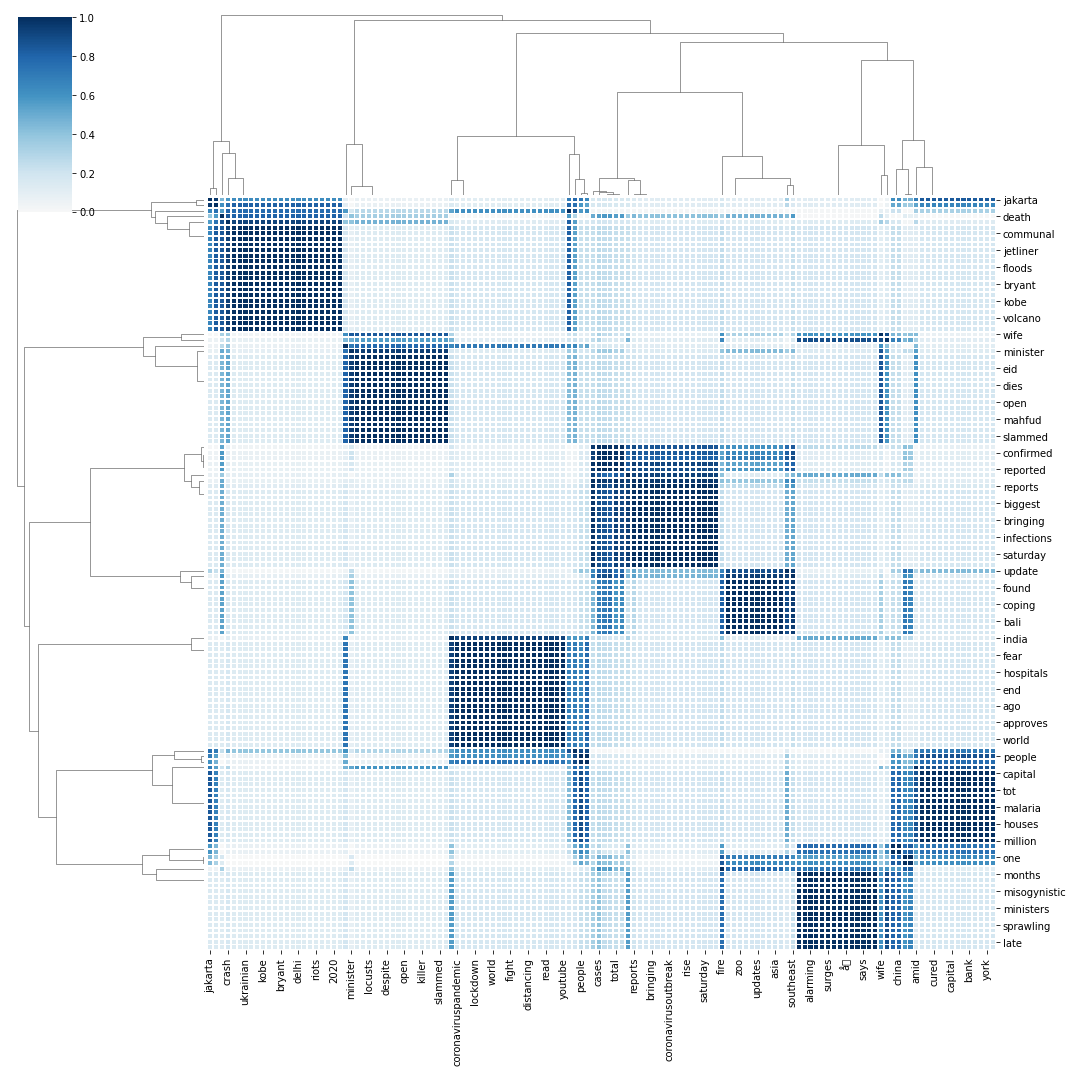

In [408]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [409]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4     -29.594002  60.112713       1        1  43.406342
5     -45.996586  11.891685       2        1  15.127971
1      20.368856  70.019325       3        1  10.145532
3      53.928768  31.704309       4        1   9.384067
6     -12.437127 -26.423267       5        1   7.433615
2       3.965971  21.797720       6        1   7.257179
0      37.524284 -16.517805       7        1   7.245293, topic_info=           Term       Freq      Total Category  logprob  loglift
184       cases  68.000000  68.000000  Default  30.0000  30.0000
3274       late  77.000000  77.000000  Default  29.0000  29.0000
185      deaths  39.000000  39.000000  Default  28.0000  28.0000
9151  sprawling  68.000000  68.000000  Default  27.0000  27.0000
9152     surges  66.000000  66.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
255       japan   1.475804   5.507065   Topic7  -5.3348   1.3080
105       times   1.599637  12.466763   Topic7  -5.2542   0.5715
336    malaysia   1.593106  15.106998   Topic7  -5.2583   0.3753
491       china   1.558185  15.700810   Topic7  -5.2804   0.3146
324      update   1.324987   8.053283   Topic7  -5.4426   0.8201

[442 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3839      1  0.877668     1029
8256      1  0.882099     1150
8651      7  1.589787      125
457       1  0.362388       13
457       6  0.362388       13
...     ...       ...      ...
2021      7  0.983967     york
642       5  0.516246  youtube
157       4  0.609108      zoo
200       1  0.954159       â
201       1  0.914072       å

[544 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 2, 4, 7, 3, 1])